**Particle Physics Event Classification using Random Forest Machine Learning Algorithm : Signal Vs Background.**

**Problem Statement:**


In the field of particle physics, accurate identification and classification of events are crucial for understanding fundamental particles and their interactions.
The provided dataset contains various features derived from particle physics experiments.
The goal is to build a machine-learning model to classify events into signal (s) and background (b) categories. This classification aids in distinguishing events of interest (signal) from background noise.

**Data Description:**


EventId: Identifier for each event in the experiment.

DER_mass_MMC: Derived mass of the Missing Mass Calculator. Represents the calculated mass of a system using the missing energy in the experiment.

DER_mass_transverse_met_lep: Indicates the mass calculated from the transverse components of missing energy and lepton.

DER_mass_vis: Derived mass of the visible part of the system. Represents the mass of the visible particles in the system, excluding invisible or undetected
particles.

DER_pt_h: Transverse momentum of the Higgs boson. Indicates the momentum of the Higgs boson in the transverse plane, providing information about its motion.

DER_deltaeta_jet_jet: The absolute difference in pseudorapidity between the two jets.Describes the angular separation between two jets in the experiment.

DER_mass_jet_jet: Derived mass of the two jets.

DER_lep_eta_centrality: Pseudorapidity centrality of the lepton concerning jets.Pseudorapidity is a spatial coordinate used in particle physics. This feature
likely indicates the centrality of the lepton (a charged particle, possibly an electron or a muon) concerning jets in the event. The centrality provides
information about the lepton's position relative to the jets.

PRI_tau_pt: Transverse momentum of the tau.Transverse momentum is the momentum of a particle in the direction perpendicular to the beamline. This feature
represents the transverse momentum of the tau particle, which is a heavy, charged particle often involved in processes like tau decays.

PRI_tau_eta: Pseudorapidity of the tau.Pseudorapidity is a measure of the angle of a particle's trajectory relative to the beamline. This feature indicates the
pseudorapidity of the tau particle, providing information about its direction.

PRI_tau_phi: Azimuthal angle of the tau.Azimuthal angle defines the rotation of a particle's trajectory around the beamline. This feature represents the
azimuthal angle of the tau particle, indicating its orientation in the transverse plane.

PRI_lep_pt: Transverse momentum of the lepton.Similar to PRI_tau_pt, this feature represents the transverse momentum of the lepton (electron or muon) in the
event.

PRI_lep_eta: Pseudorapidity of the lepton.Similar to PRI_tau_eta, this feature indicates the pseudorapidity of the lepton, providing information about its
angular position relative to the beamline.

PRI_lep_phi: Azimuthal angle of the lepton.Similar to PRI_tau_phi, this feature represents the azimuthal angle of the lepton, indicating its orientation in the
transverse plane.

PRI_met: Missing transverse energy.Missing transverse energy is a crucial concept in particle physics. It represents the imbalance in transverse energy in an
event, suggesting the presence of undetected particles or neutrinos.

PRI_met_phi: Azimuthal angle of the missing transverse energy.Similar to PRI_tau_phi and PRI_lep_phi, this feature represents the azimuthal angle of the
missing transverse energy, indicating its orientation in the transverse plane.

PRI_met_sumet: Sum of the transverse energy of all objects in the event.This feature represents the sum of the transverse energy (energy component
perpendicular to the beamline) of all objects (particles) detected in the event. It provides a measure of the overall energy flow in the transverse plane.

PRI_jet_num: Number of jets in the event.Indicates the count of jets observed in the event. Jets are collimated sprays of particles resulting from high-energy
interactions. Knowing the number of jets is crucial for understanding the event's characteristics.

PRI_jet_leading_pt: Transverse momentum of the leading jet.Represents the transverse momentum of the jet with the highest transverse momentum in the event. The
leading jet is the one with the most significant momentum contribution.

PRI_jet_leading_eta: Pseudorapidity of the leading jet.Indicates the pseudorapidity (angular position) of the leading jet, providing information about its
direction in the detector.

PRI_jet_leading_phi: Azimuthal angle of the leading jet.Represents the azimuthal angle of the leading jet, indicating its orientation in the transverse plane.

PRI_jet_subleading_pt: Transverse momentum of the subleading jet.Represents the transverse momentum of the second-highest transverse momentum jet in the event
(subleading jet).

PRI_jet_subleading_eta: Pseudorapidity of the subleading jet.Indicates the pseudorapidity of the subleading jet, providing information about its angular
position in the detector.

PRI_jet_subleading_phi: Azimuthal angle of the subleading jet.Represents the azimuthal angle of the subleading jet, indicating its orientation in the
transverse plane.

PRI_jet_all_pt: Sum of the transverse momentum of all jets in the event.This feature represents the sum of the transverse momentum of all jets detected in the
event. It provides a measure of the overall transverse momentum contributed by all jets.

Weight: A weight associated with each event.The weight is a numerical value assigned to each event. It is often used as a scaling factor to account for the
significance or importance of each event in the analysis. The weight may be applied during training and evaluation to adjust the contribution of each event to
the model.

-- ** TARGET ** --

Target column(Label): The target variable, indicating the class or label of each event (s or b). This is the target variable where each event is labeled as
either signal (s) or background (b).

**Why to choose Random Forest Algorithm?**

**Because if the  datasets are huge, highly imbalanced, noisy, and complex.**

**1. Handles Nonlinearity and Complex Interactions**

Particle collisions generate many correlated variables (jet energies, angles, missing transverse energy, etc.).

Random Forest builds multiple decision trees and averages them, automatically capturing nonlinear patterns and variable interactions without needing feature engineering.

**2. Robust to Noise and Outliers**

Experimental data often contains detector noise and mismeasured events.

Random Forest is relatively robust against outliers, since each tree only sees a bootstrap sample and aggregates results.

**3. Works Well on Imbalanced Data**

In high-energy physics, signal events (like Higgs bosons) are rare compared to background (QCD jets, noise).

RF supports:

class_weight='balanced' → adjusts for rare signal events.

Can use event weights from simulations → very important in physics.

**4. Feature Importance**

Physicists want interpretability:

RF gives feature_importances_, telling which variables (mass, angular separation, jet energy, etc.) are most discriminating between signal and background.

Helps guide theoretical and detector studies.

**5. OOB Validation (Built-in Cross-Validation)**

RF has out-of-bag (OOB) estimates, which provide a free internal validation metric.

Useful when splitting precious simulated data for training vs. testing.

In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve,confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler


# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv("/content/drive/MyDrive/Data_Set_Practice/Placement_Data /Data_science_dataset.csv")    # Particle Physics  Event Classification Data set
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Dimension
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 250000 rows and 33 columns.


In [ ]:
# Data sample
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
data.info() #get a concise summary of a DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
# Descriptive statistics for the numerical columns .

data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
# Count the number of missing values in each column of the DataFrame 'data'.

data.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


In [ ]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 32 numerical features and 1 categorical features.


In [ ]:
# Checking the data type and missing values with sample

# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),
                            columns = ['Missing_percent'])

# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)

# Renaming the dataframe columns
sample_data.rename(columns = {0: 'Sample1',
                              1: 'Sample2'}, inplace = True)

# Concatinating the above dataframe
data_concat = pd.concat([data_missing, data_type, sample_data], axis=1)

data_concat

,Missing_percent,Data_type,Sample1,Sample2
EventId,0.0,int64,100000,100001
DER_mass_MMC,0.0,float64,138.47,160.937
DER_mass_transverse_met_lep,0.0,float64,51.655,68.768
DER_mass_vis,0.0,float64,97.827,103.235
DER_pt_h,0.0,float64,27.98,48.146
DER_deltaeta_jet_jet,0.0,float64,0.91,-999.0
DER_mass_jet_jet,0.0,float64,124.711,-999.0
DER_prodeta_jet_jet,0.0,float64,2.666,-999.0
DER_deltar_tau_lep,0.0,float64,3.064,3.473
DER_pt_tot,0.0,float64,41.928,2.078


In [ ]:
# data duplicates
print(f'The data has {data[data.duplicated()].shape[0]} duplicate rows.')

The data has 0 duplicate rows.


In [ ]:
# Understanding the categorical data
for attribute in data.columns:
    if data[attribute].dtype == 'O':
        if data[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique value.**')
        else:
            print(f'{attribute} has {data[attribute].nunique()} unique value.')

Label has 2 unique value.


In [ ]:
# Analysing the dependent / target attribute
round(data['Label'].value_counts(normalize=True)*100 , 2)

,proportion
Label,
b,65.73
s,34.27


Label
b    65.7332
s    34.2668
Name: proportion, dtype: float64
Index: Index(['b', 's'], dtype='object', name='Label')
Values: [65.7332 34.2668]


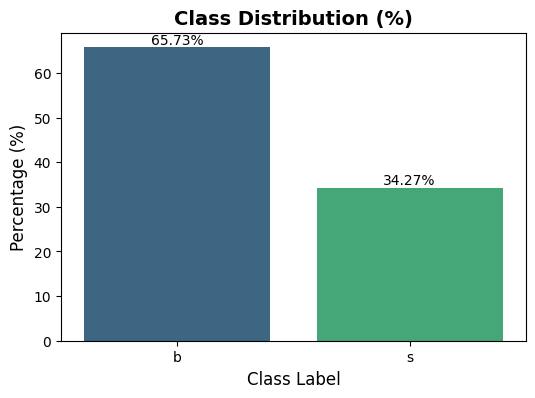

In [ ]:
# Value counts
class_counts = data['Label'].value_counts(normalize=True)*100
print(class_counts)
print("Index:",class_counts.index )
print("Values:",class_counts.values)
# Plot
plt.figure(figsize=(6,4)) # Starts a new plot with width 6 inches and height 4 inches.
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
ax.bar_label(ax.containers[0], fmt="%.2f%%")  # add % labels
ax.bar_label(ax.containers[1], fmt="%.2f%%")
plt.title("Class Distribution (%)", fontsize=14, fontweight="bold")
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()

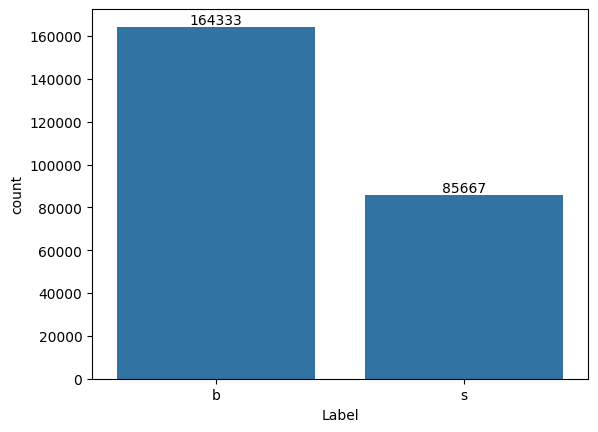

In [ ]:
# understand the target variable
#Plotting the graph for Label
ax = sns.countplot(x=data['Label'],
                   order=data['Label'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

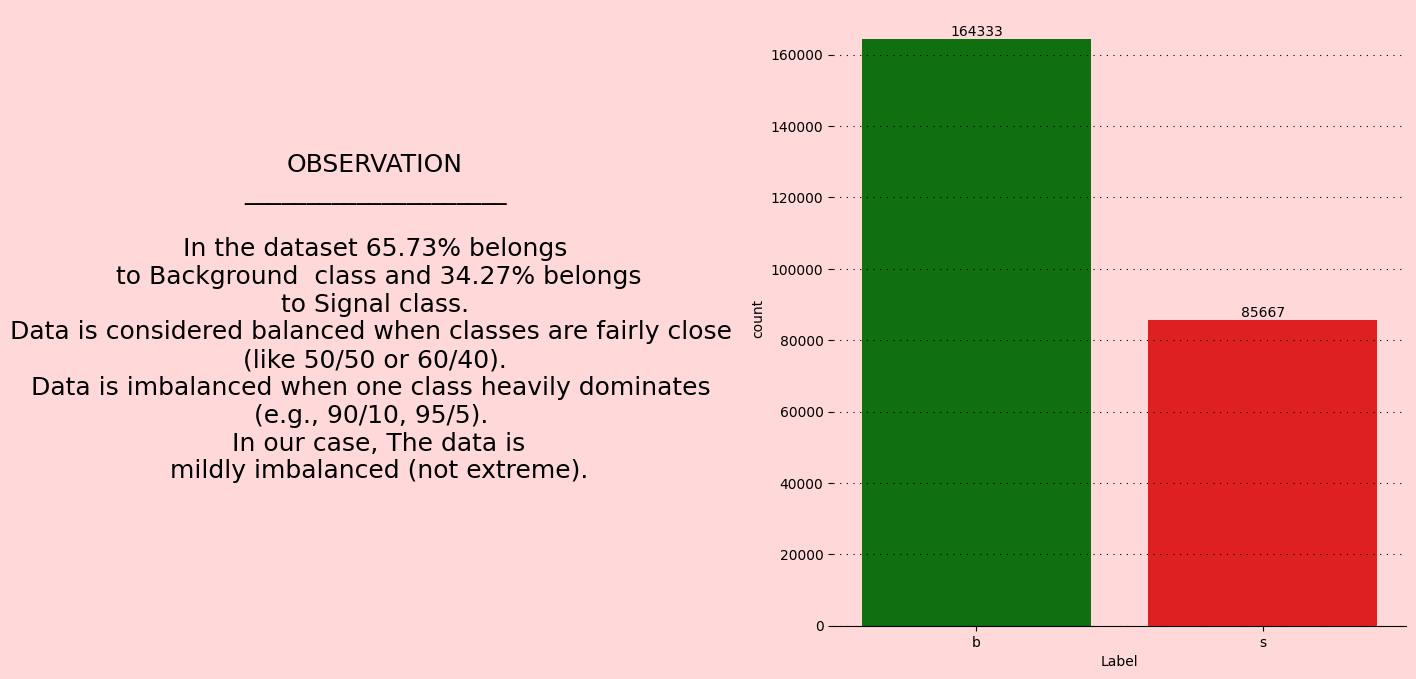

In [ ]:
# Analysing the target column

# creating a plot structure
fig = plt.figure(figsize=(17, 8))    #sets the width to 17 inches and height to 8 inches
spec = fig.add_gridspec(1, 2)        # the figure is split into two side-by-side sections.
spec.update(wspace=0.3, hspace=0.15) #Adjusts spacing between subplots.wspace=0.3 → adds extra space between the left and right plots.
sec_1 = fig.add_subplot(spec[0,0])   #Adds the first subplot in grid position row 0, column 0 (top-left).
sec_2 = fig.add_subplot(spec[0,1])   #Adds the second subplot in grid position row 0, column 1 (top-right).

# adding color
bg_color = '#ffd9d9'

for selection in [ fig,sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph for label
ax = sns.countplot(x=data['Label'],
                   order=data['Label'].value_counts().index,
                   palette=['green','red'])

# Add value labels
for container in ax.containers:
    ax.bar_label(container)    #The count of each class is displayed on top of each bar.

sec_2.grid(color='black', axis='y', ls=':', dashes=(1,5))

# Narrating the observation
max, min = round(data['Label'].value_counts(normalize=True)*100, 2)
sec_1.text(0.5, 0.5, f'OBSERVATION\n_____________________\n\nIn the dataset {max}% belongs\n to Background  class \
and {min}% belongs\n to Signal class. \nData is considered balanced when classes are fairly close \n(like 50/50 or 60/40).\nData is imbalanced when one class heavily dominates \n(e.g., 90/10, 95/5). \n In our case, The data is\n mildly imbalanced (not extreme).', va='center', ha='center', size=18)

# Removing the spines and axis
sec_1.xaxis.set_visible(False) #Hide axes ticks and labels on sec_1:
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for section in [sec_1, sec_2]:
        if position == 'bottom' and section == sec_2:
            continue
        else:
            section.spines[position].set_visible(False)

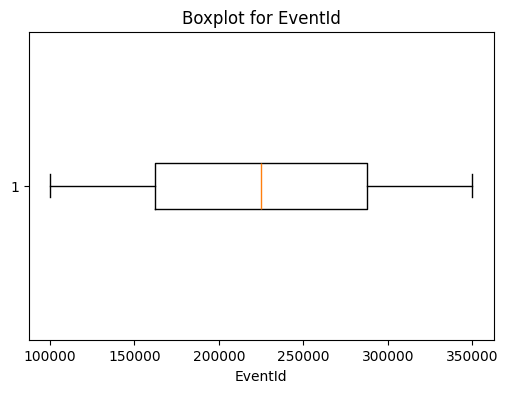

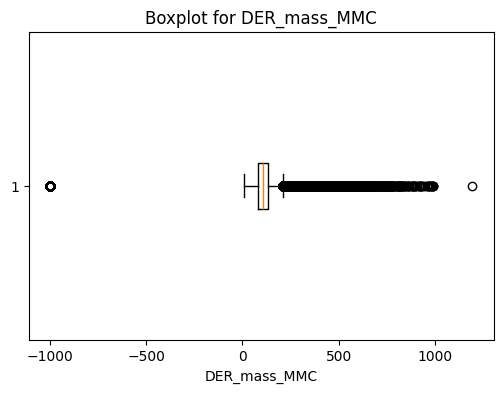

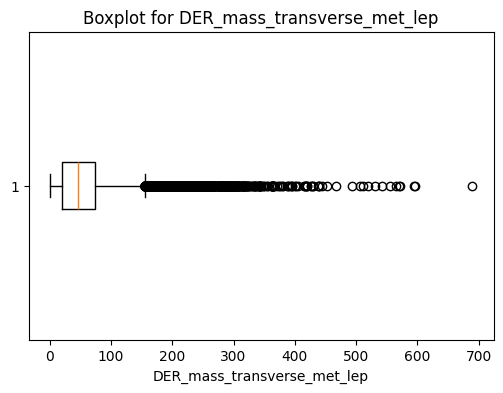

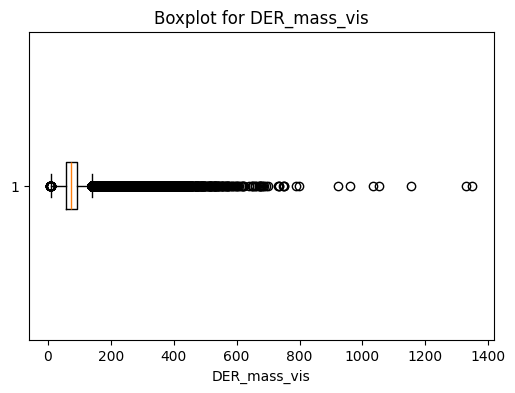

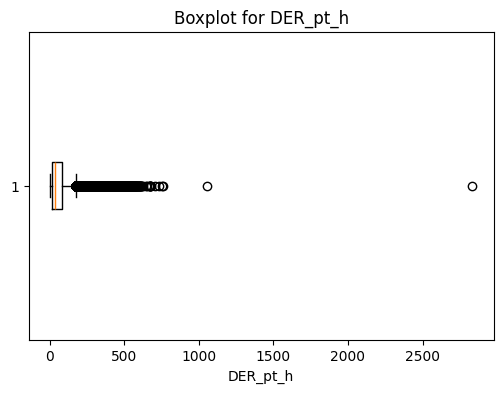

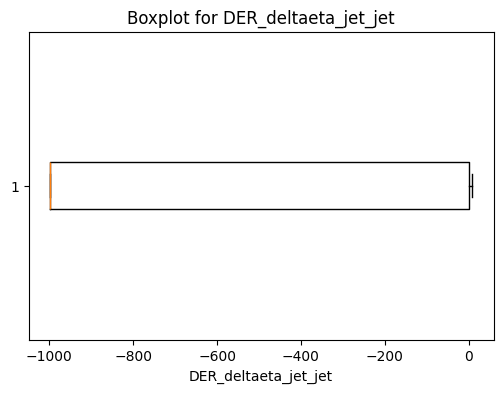

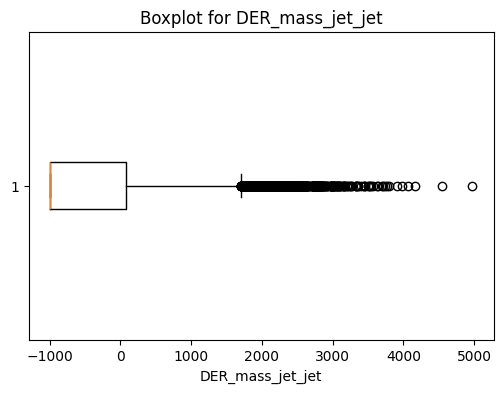

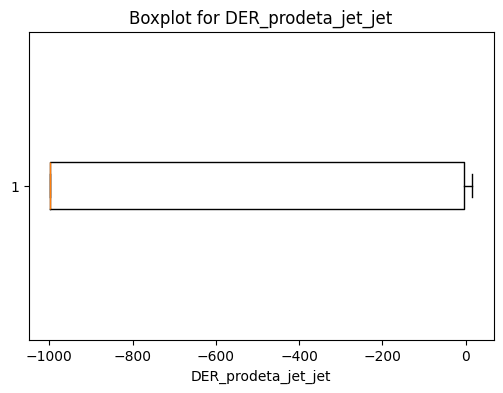

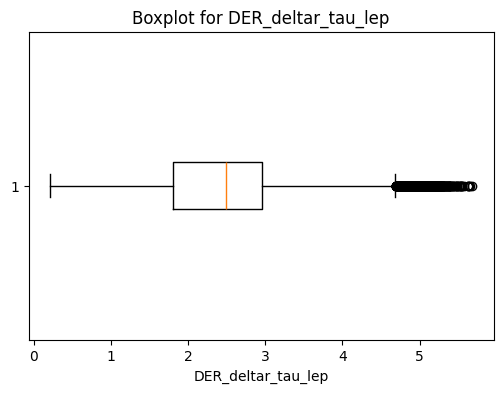

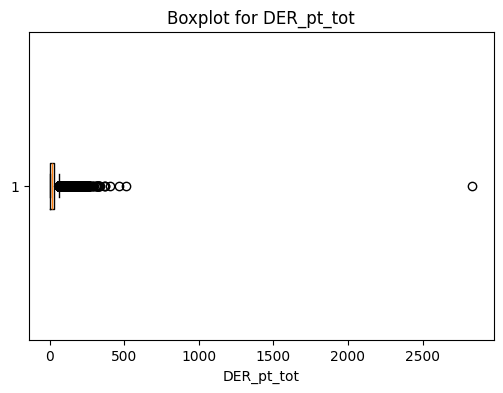

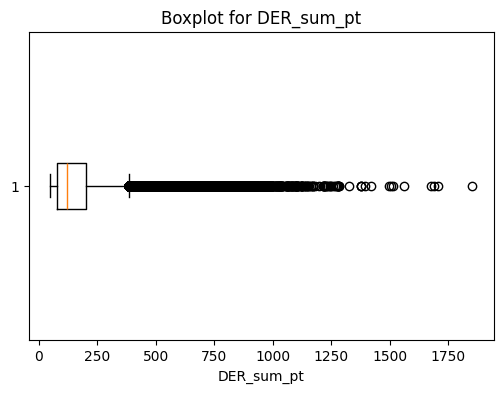

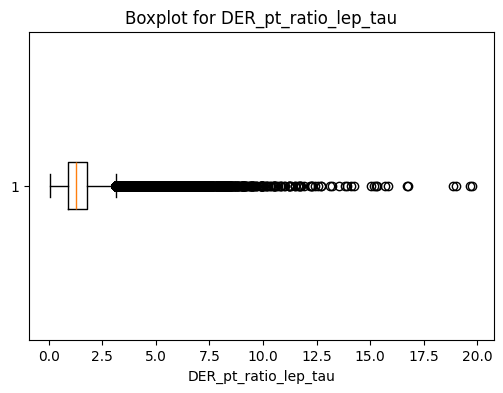

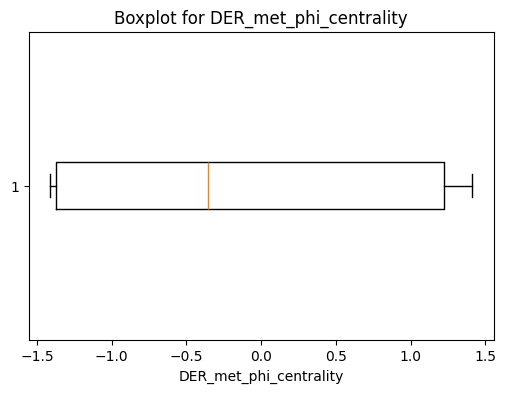

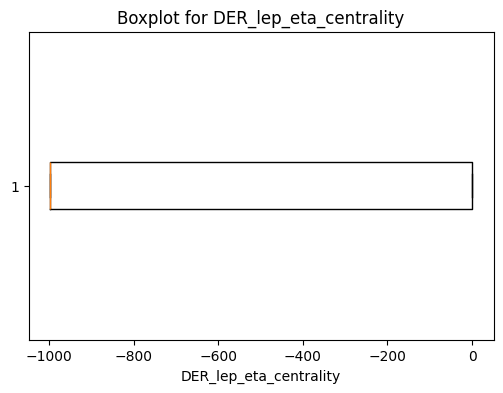

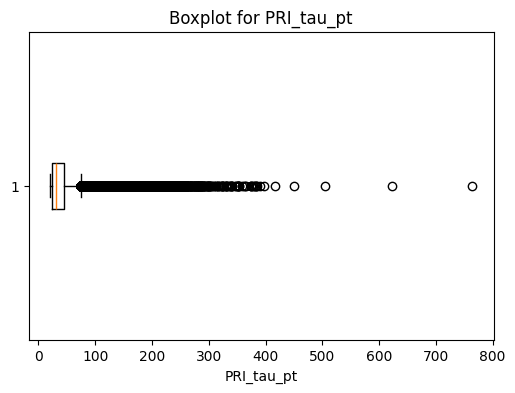

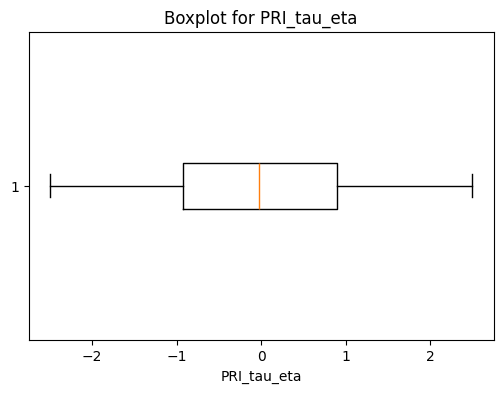

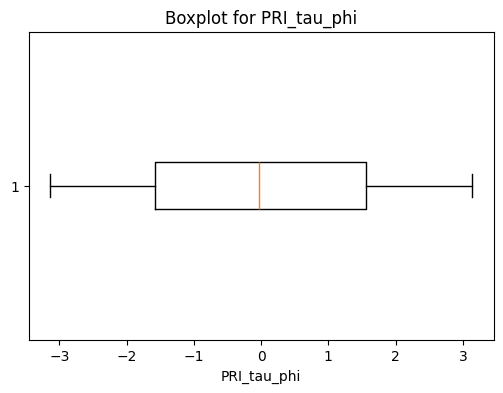

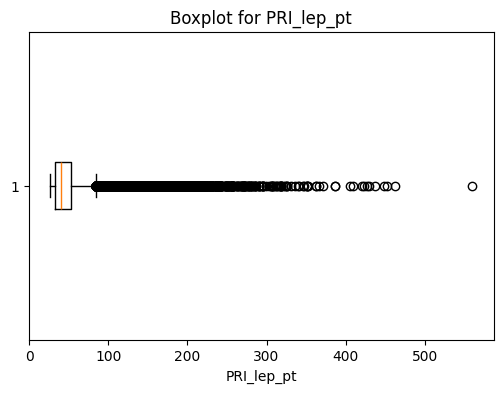

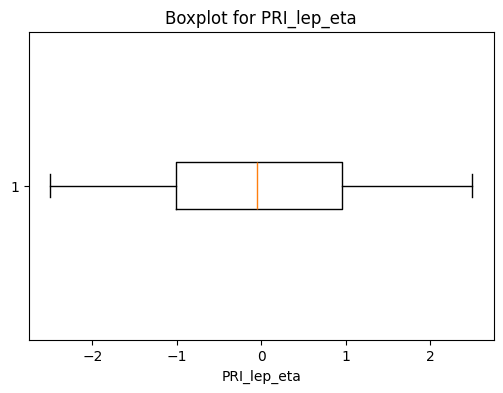

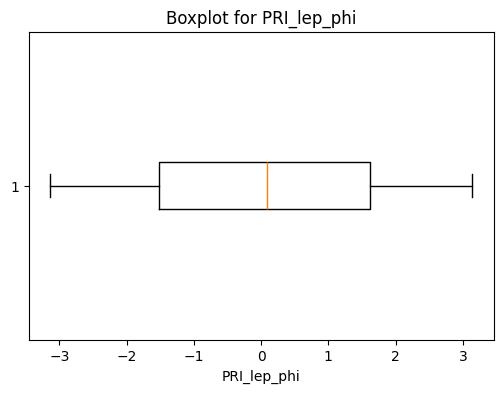

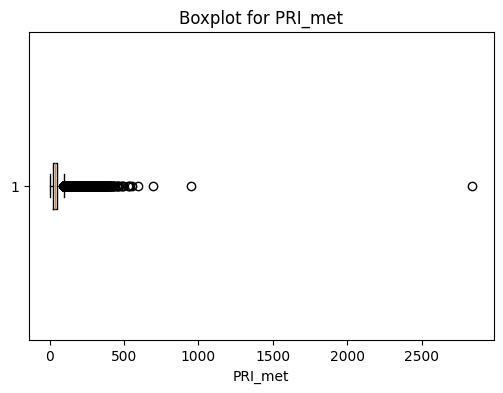

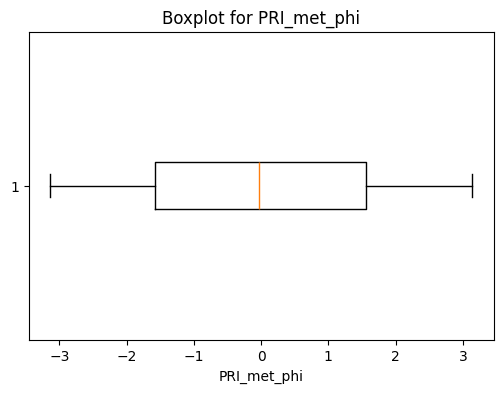

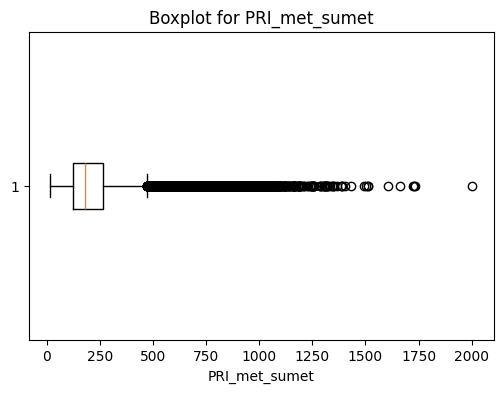

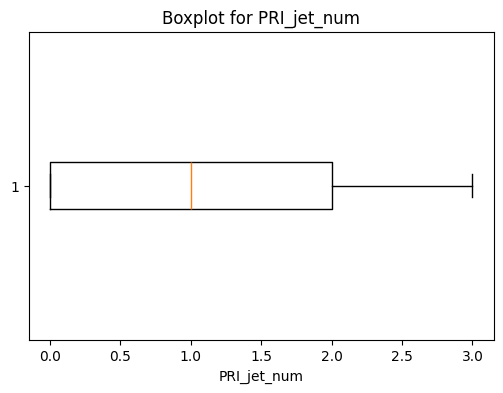

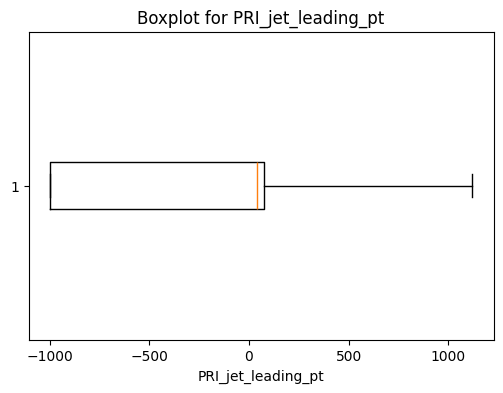

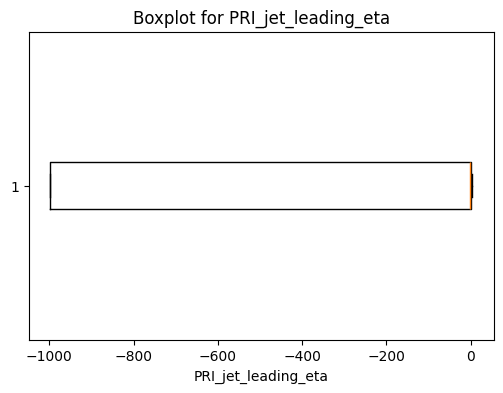

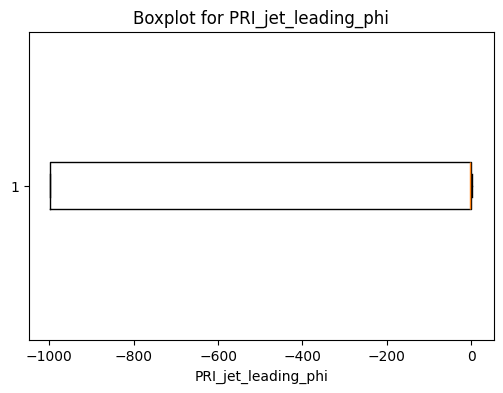

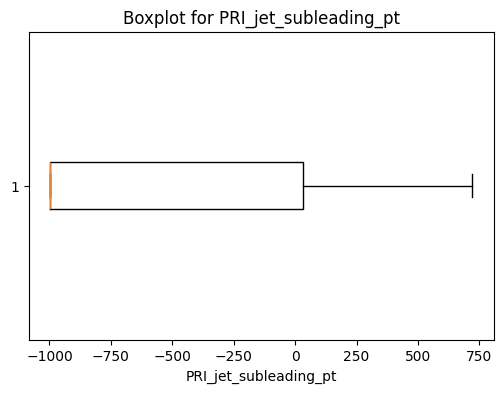

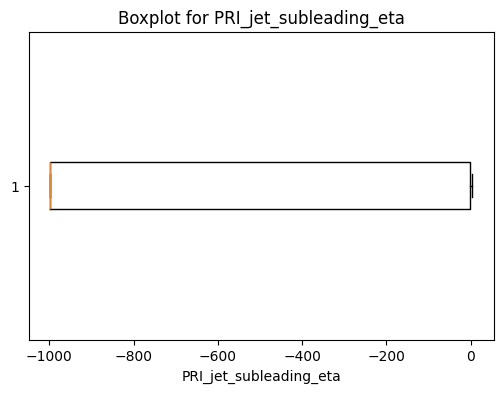

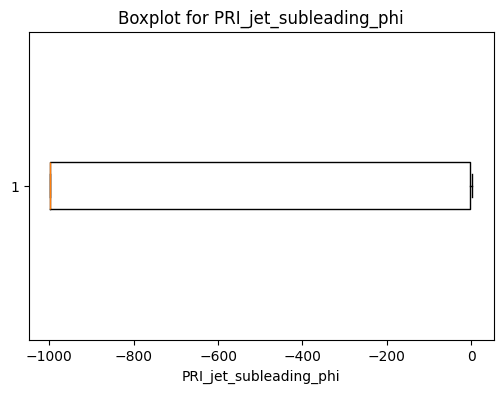

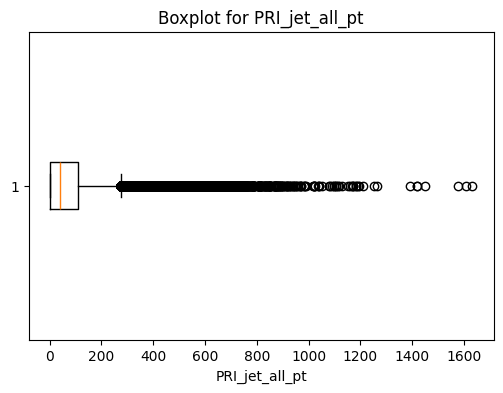

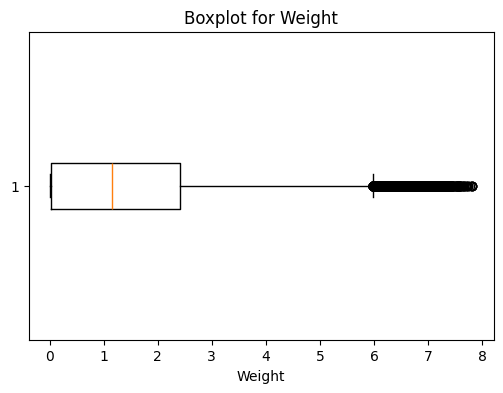

In [ ]:
data_numeric = data.drop(columns=['Label']).select_dtypes(include=['int64', 'float64'])

# Loop through each numeric column and plot boxplot
for col in data_numeric.columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(data_numeric[col],vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

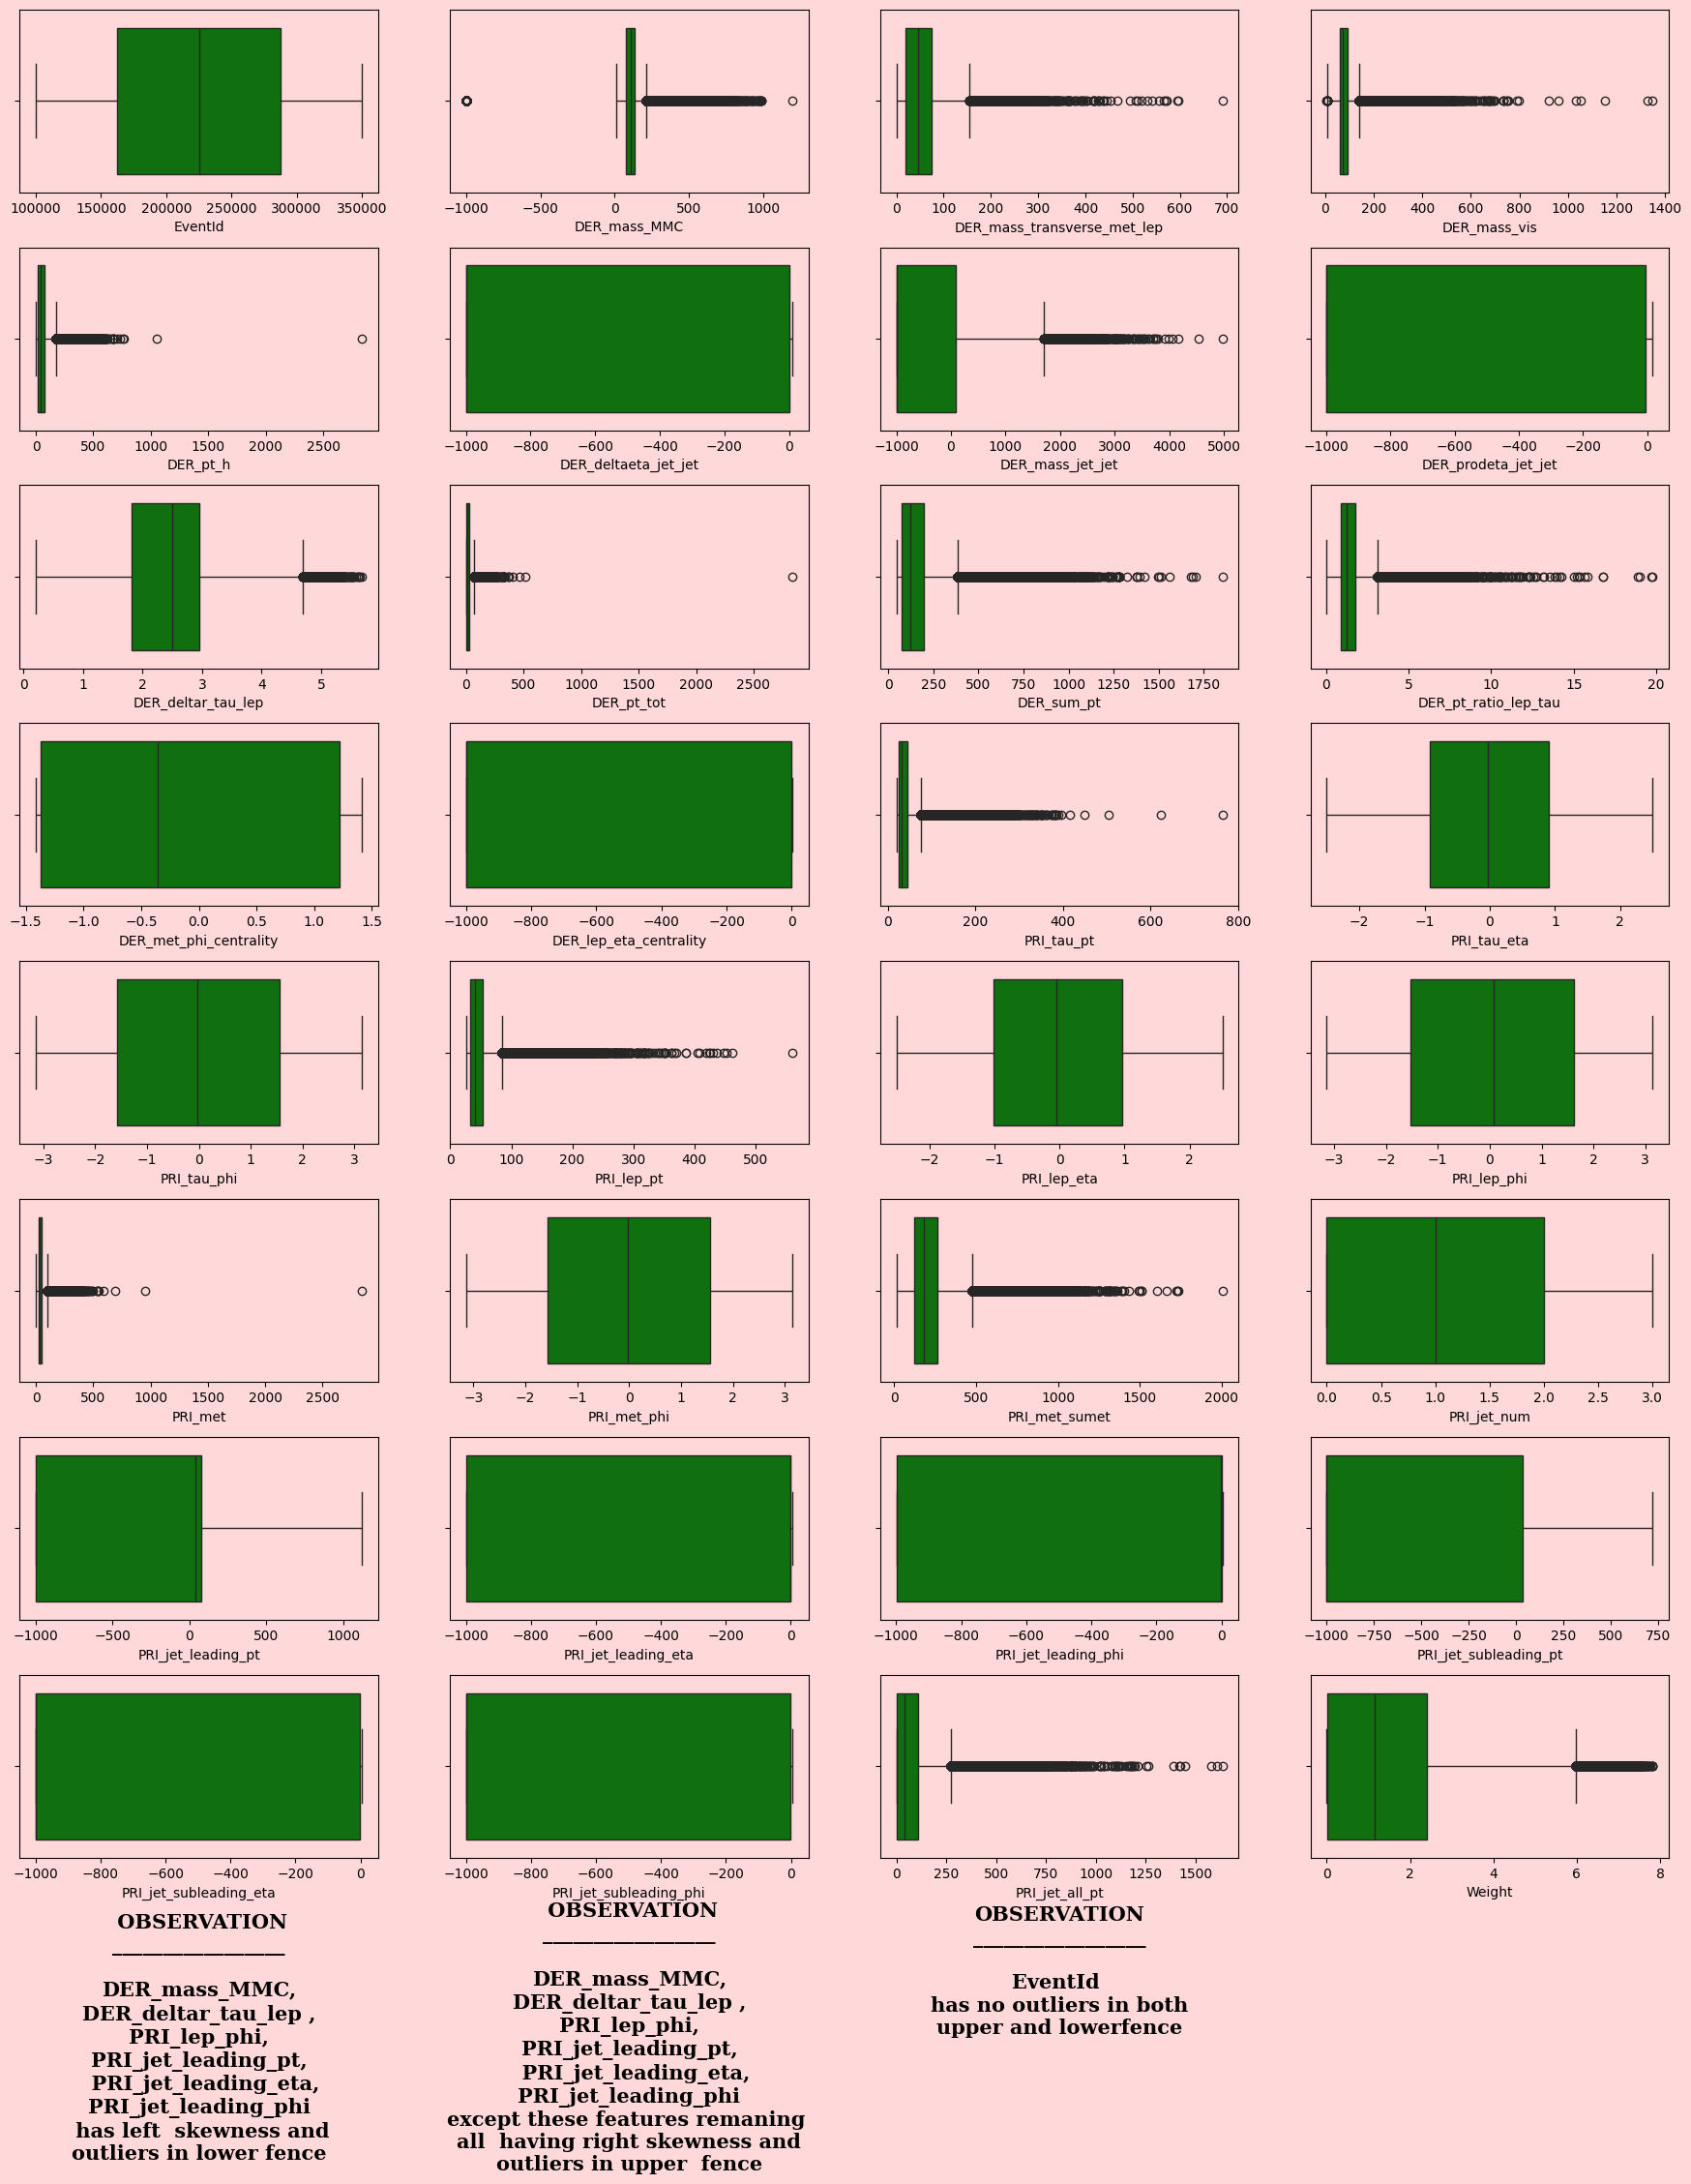

In [ ]:
# Creating subplots
fig = plt.figure(figsize=(22,28)) #Width = 22 inches, Height = 28 inches
spec = fig.add_gridspec(9,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])


# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22,sec_23,
       sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35]
cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O' :
        sns.boxplot(data[feature], orient='h', ax=sec[cnt], color='green')
        cnt += 1
# Narating the observations
sec_33.text(0.5,0.5,'\n \n\n OBSERVATION\n_________________\n\n\
DER_mass_MMC,\nDER_deltar_tau_lep ,\nPRI_lep_phi,\nPRI_jet_leading_pt,\
\n  PRI_jet_leading_eta,\nPRI_jet_leading_phi\n has left  skewness and\
\noutliers in lower fence',ha='center',va='center', size=15, family='serif', weight=600)


sec_34.text(0.5,0.5,'\n \n\n OBSERVATION\n_________________\n\n\
DER_mass_MMC,\nDER_deltar_tau_lep ,\nPRI_lep_phi,\nPRI_jet_leading_pt,\
\n  PRI_jet_leading_eta,\nPRI_jet_leading_phi\nexcept these features remaning \nall  having right skewness and\
\noutliers in upper  fence',ha='center',va='center', size=15, family='serif', weight=600)

sec_35.text(0.5,0.68,'OBSERVATION\n_________________\n\nEventId \nhas no outliers in both\nupper and lowerfence',
ha='center',va='center', size=15, family='serif', weight=600)


# Removing axis and spines
for sec in [sec_33, sec_34, sec_35]:
    sec.axis('off') #It hides all spines, ticks, and labels in one line.

In [ ]:

# detecting left and right skewed feature for numeric columns

for col in data.columns:
    if data[col].dtype != 'O' and len(data[col].unique())>2:

      if data[col].skew() > 0:
         print(col ,'\t\t\t\t'," value is", data[col].skew(),"so it's Right Skewed")
      elif  data[col].skew() < 0:
         print(col ,'\t\t\t\t'," value is", data[col].skew(),"so it's Left Skewed")
      else:
         print(col ,'\t\t\t\t'," value is Close to 0/Zero (approximately Symmetric)")

EventId 				  value is Close to 0/Zero (approximately Symmetric)
DER_mass_MMC 				  value is -1.8547180472834686 so it's Left Skewed
DER_mass_transverse_met_lep 				  value is 1.219210854425645 so it's Right Skewed
DER_mass_vis 				  value is 3.7902619941309186 so it's Right Skewed
DER_pt_h 				  value is 2.5418849147114626 so it's Right Skewed
DER_deltaeta_jet_jet 				  value is 0.9246732710830895 so it's Right Skewed
DER_mass_jet_jet 				  value is 1.4094074501550942 so it's Right Skewed
DER_prodeta_jet_jet 				  value is 0.9247405514436711 so it's Right Skewed
DER_deltar_tau_lep 				  value is -0.21578158719831483 so it's Left Skewed
DER_pt_tot 				  value is 10.579309301247028 so it's Right Skewed
DER_sum_pt 				  value is 2.3206467875425387 so it's Right Skewed
DER_pt_ratio_lep_tau 				  value is 2.6335210242242355 so it's Right Skewed
DER_met_phi_centrality 				  value is 0.15113626592477558 so it's Right Skewed
DER_lep_eta_centrality 				  value is 0.9246813016872827 so it's Rig

In [ ]:
# Replacing the outlier with fenced IQR values

for feature in data:
    if data[feature].dtype != 'O' and len(data[feature].unique())>2:

        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile- lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)

        data[feature] = np.where(data[feature]>upper_fence,
                                 upper_fence,
                                 data[feature])

        data[feature] = np.where(data[feature]<lower_fence,
                                 lower_fence,
                                 data[feature])

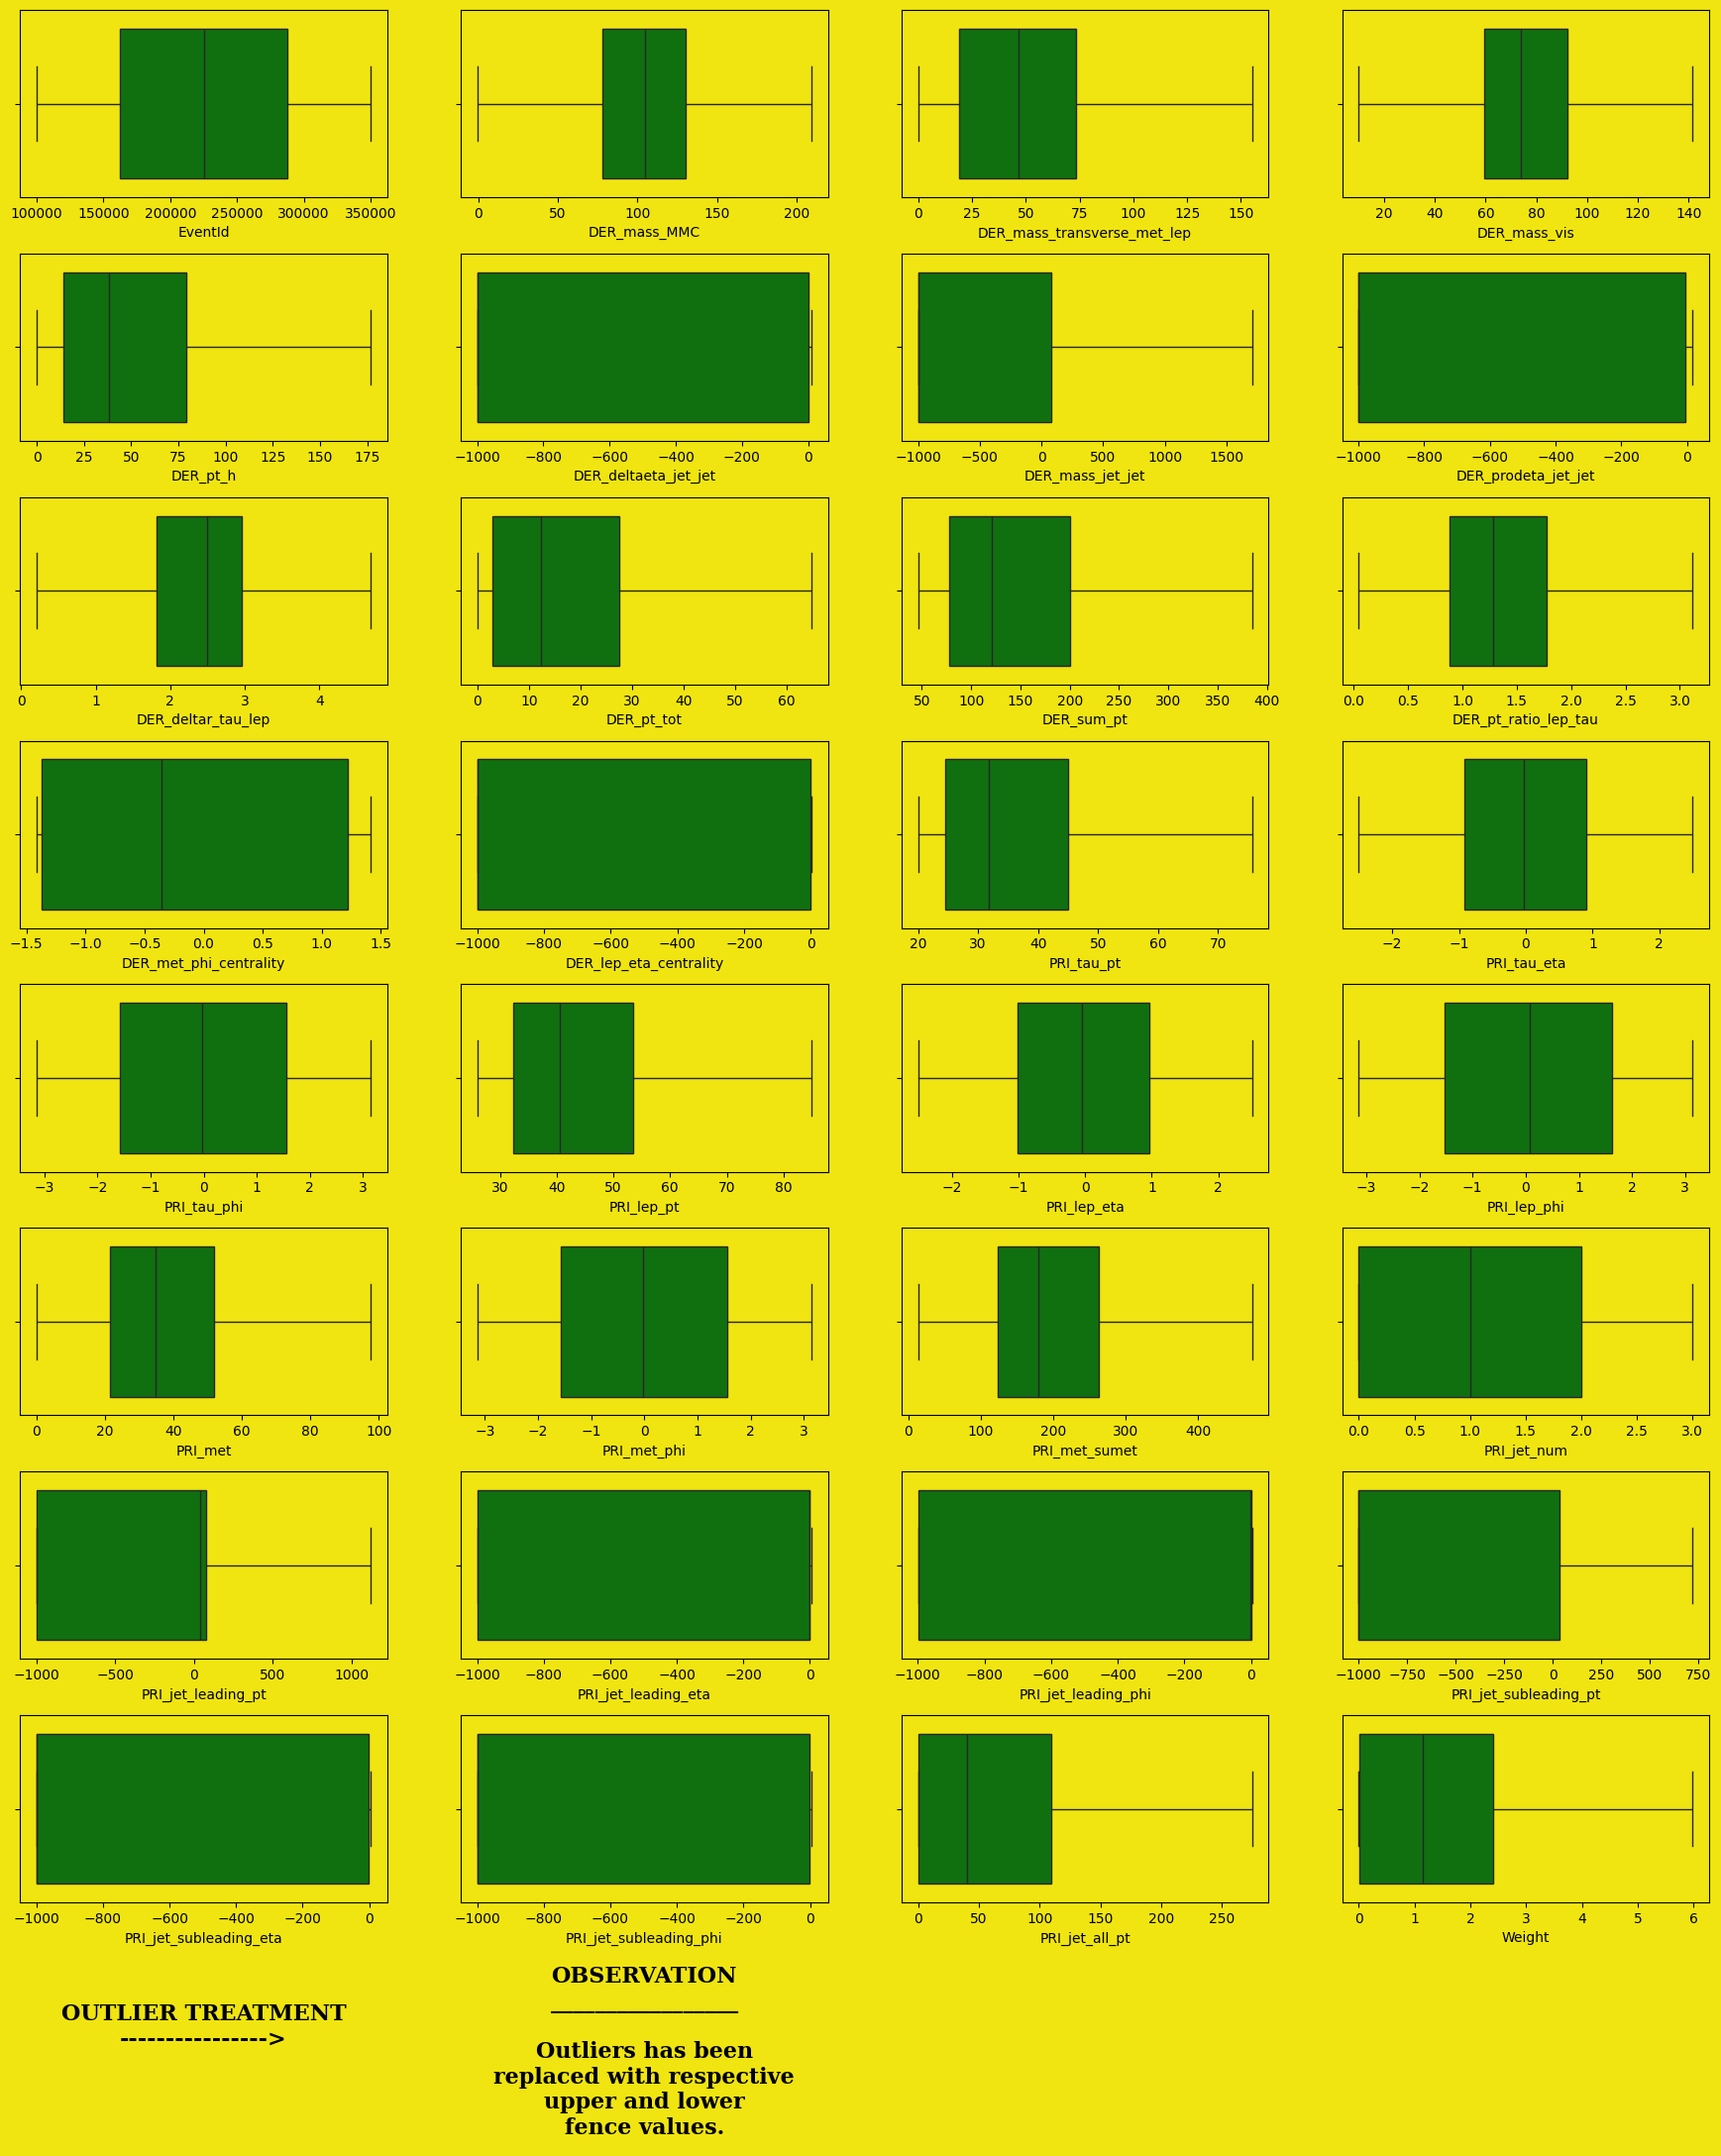

In [ ]:
#After Treating outlier treatment
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(9,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])


# Adding color preference
bg_color = '#F0E511'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22,sec_23,
       sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35]
cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O' :
        sns.boxplot(data[feature], orient='h', ax=sec[cnt], color='green')
        cnt += 1
# Narating the observations
sec_33.text(0.5,0.5,'OUTLIER TREATMENT\n---------------->\n\n',
ha='center',va='center', size=16, family='serif', weight=600)


sec_34.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
Outliers has been\nreplaced with respective\nupper and lower\nfence values.',
ha='center',va='center', size=16, family='serif', weight=600)



# Removing axis and spines

for sec in [sec_33, sec_34,sec_35]:
    sec.axis('off') #It hides all spines, ticks, and labels in one line.

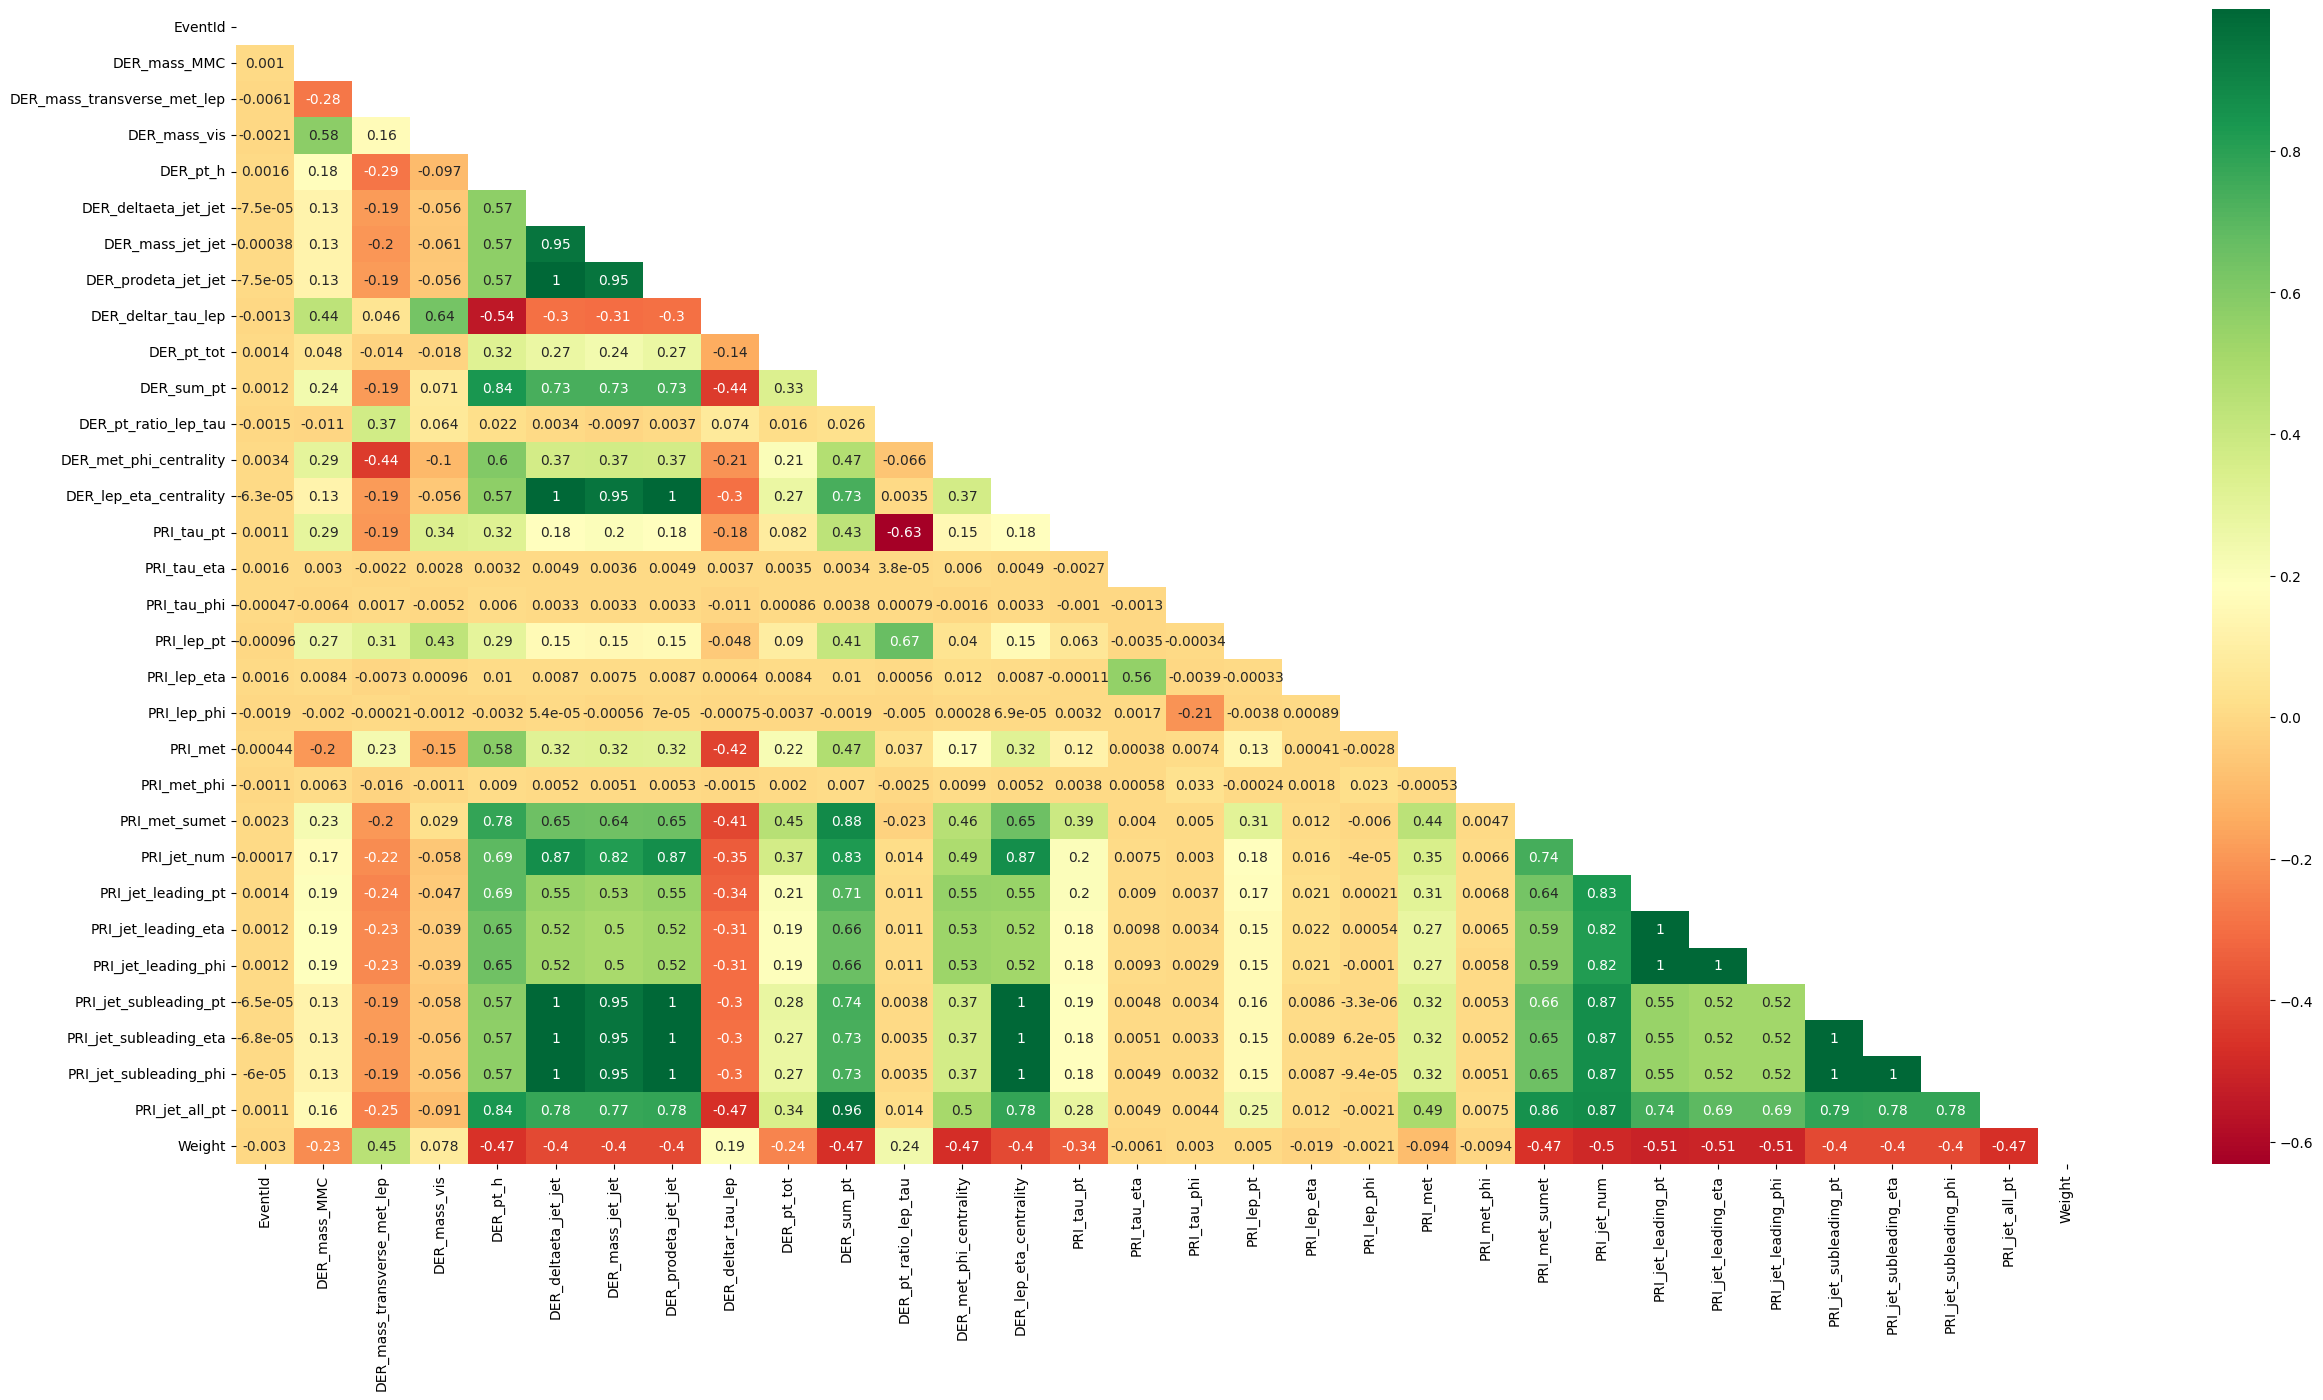

In [ ]:
plt.figure(figsize = (30,15))
correlation_matrix = data.drop(columns=['Label']).corr()
upper = np.triu(correlation_matrix) #np.triu() returns the upper triangular part of the correlation matrix.
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn',mask=upper)
plt.show()

In [ ]:

#Splitting Data into dependent and independent Variable
# Dropping EventId,weight  and Label column for Independent variable
# independent variables Label → the target variable, Signal/Background,Weight → event weights for training (used later, not as input features).
#EventId → just an identifier, not meaningful for prediction.
x = data.drop(['Label','Weight','EventId'],axis=1)

# Taking Target variable as y
data['Label'] = data['Label'].map({'s': 1, 'b': 0})

y = data['Label'] # target variable (Signal/Background)

weights =data['Weight'] # event weights for training

In [ ]:


# train test split
#Train-test split (keep stratify=y to balance Signal vs Background)
x_train,x_test, y_train, y_test, w_train, w_test= train_test_split( x, y, weights, test_size=0.3, stratify=y, random_state=42) #random stratified sampling.

# dimension of the split
print('Training data dimension:')
print(x_train.shape)
print(y_train.shape)
print(w_train.shape)
print('\nTesting data dimension:')
print(x_test.shape)
print(y_test.shape)
print(w_test.shape)

Training data dimension:
(175000, 30)
(175000,)
(175000,)

Testing data dimension:
(75000, 30)
(75000,)
(75000,)


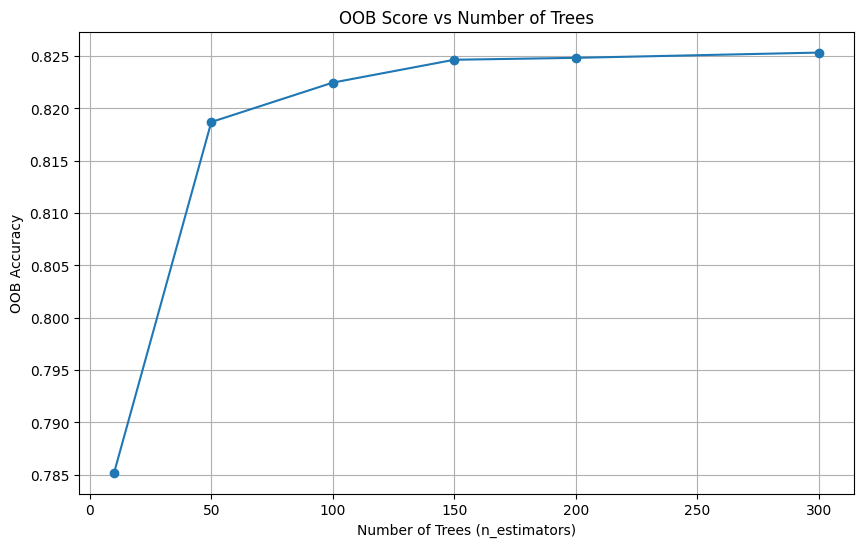

In [ ]:
oob_scores = []
n_estimators_list = [10, 50, 100, 150, 200, 300]

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train, sample_weight=w_train)
    oob_scores.append(rf.oob_score_)     #rf.oob_score_ → shows the accuracy on the out-of-bag samples.

# Plot
plt.figure(figsize=(10,6))
plt.plot(n_estimators_list, oob_scores, marker='o')
plt.title("OOB Score vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("OOB Accuracy")
plt.grid(True)
plt.show()

In [ ]:
print("The biggest improvement happens between 10 → 50 trees.")
print("After 100 trees, the curve flattens out")
print("From 150 trees onwards, there is almost no improvement in OOB accuracy")
print("So Choosing the  n_estimators between 150–200 is the best choice")

The biggest improvement happens between 10 → 50 trees.
After 100 trees, the curve flattens out
From 150 trees onwards, there is almost no improvement in OOB accuracy
So Choosing the  n_estimators between 150–200 is the best choice


In [ ]:
#Random Forest Model Building
final_model = RandomForestClassifier(n_estimators=150, class_weight='balanced',random_state=42)

In [ ]:
# Training the model with event weights
#Without sample_weight, the Random Forest treats all samples equally.
#With sample_weight, the model gives higher importance to events with larger weights, which improves performance on rare but important events.
final_model.fit(x_train, y_train,sample_weight=w_train)



RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

Training Accuracy Score(unweighted): 100.0 %
Training Accuracy Score(weighted): 100.0 %
Testing Accuracy Score (unweighted): 82.67 %
Testing Accuracy Score (weighted):   91.65 %
Precision: 1.42
Recall   : 0.7050791504399123
ROC AUC (weighted): 92.09 %


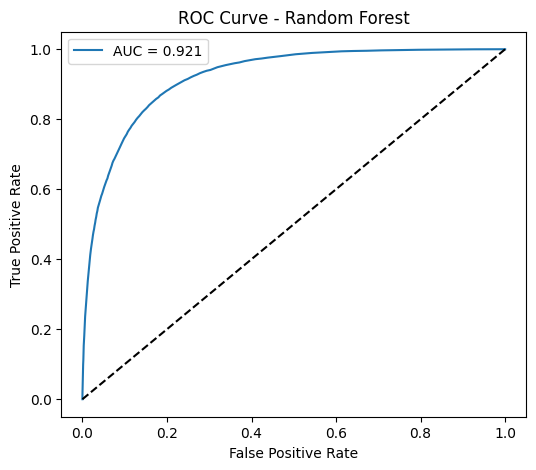

Classification Report (weighted by sample_weight):

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.92      0.96 122489.37420422897
           1       0.01      0.71      0.03 207.6524791019955

    accuracy                           0.92 122697.02668333096
   macro avg       0.51      0.81      0.49 122697.02668333096
weighted avg       1.00      0.92      0.95 122697.02668333096



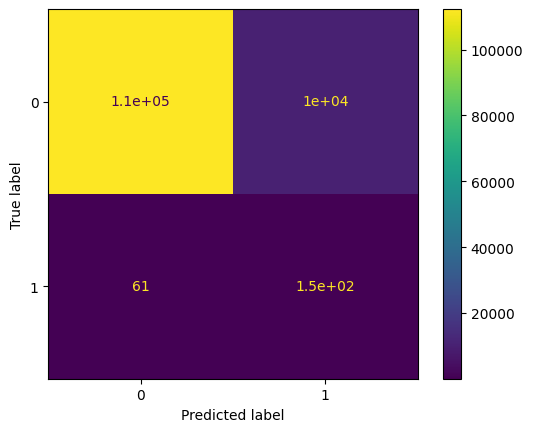

In [ ]:

# predictions
y_pred = final_model.predict(x_test)

#training score for unweighted and weighted
print('Training Accuracy Score(unweighted):', round(final_model.score(x_train, y_train)*100, 2), '%')
print('Training Accuracy Score(weighted):', round(final_model.score(x_train, y_train,sample_weight=w_train)*100, 2), '%')

#testing score for unweighted and weighted
test_acc_unweighted = round(accuracy_score(y_test, y_pred)*100, 2)
test_acc_weighted = round(accuracy_score(y_test, y_pred, sample_weight=w_test)*100, 2)

print(f"Testing Accuracy Score (unweighted): {test_acc_unweighted} %")
print(f"Testing Accuracy Score (weighted):   {test_acc_weighted} %")

print("Precision:", round(precision_score(y_test, y_pred, sample_weight=w_test)*100,2)) #how many of the predicted positives are actually positive.
print("Recall   :", recall_score(y_test, y_pred, sample_weight=w_test)) #OOut of all the actual positive cases, how many did the model correctly identify.


#ROC AUC (Area Under the Receiver Operating Characteristic Curve).
#Measures how well the model separates signal from background across all probability thresholds.
#sample_weight=w_test → gives more importance to significant events, which is critical in particle physics.

y_test_proba = final_model.predict_proba(x_test)[:, 1]  # probability of positive (signal) class.
auc_weighted = round(roc_auc_score(y_test, y_test_proba, sample_weight=w_test)*100,2) #roc_auc_score is used to measure the performance of a binary classifier at all classification thresholds.
print("ROC AUC (weighted):", auc_weighted,'%')


fpr, tpr, thr= roc_curve(y_test, y_test_proba, sample_weight=w_test,pos_label=1) #It  measure the performance of a binary classifier at all classification thresholds

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_proba, sample_weight=w_test):.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

print("Classification Report (weighted by sample_weight):\n")
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,sample_weight=w_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred,sample_weight=w_test))

(230066, 30) (230066,)
Training Accuracy (SMOTE,unweighted): 100.0 %
Training Accuracy (SMOTE, weighted): 100.0
Testing Accuracy (unweighted): 82.83 %
Testing Accuracy (weighted):   89.25 %
Precision: 1.22
Recall   : 78.25
ROC AUC (weighted): 92.63 %


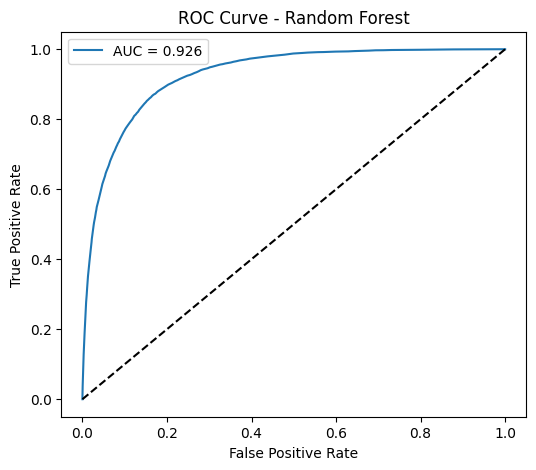

Classification Report (weighted by sample_weight):
               precision    recall  f1-score   support

           0       1.00      0.89      0.94 122489.37420422897
           1       0.01      0.78      0.02 207.6524791019955

    accuracy                           0.89 122697.02668333096
   macro avg       0.51      0.84      0.48 122697.02668333096
weighted avg       1.00      0.89      0.94 122697.02668333096



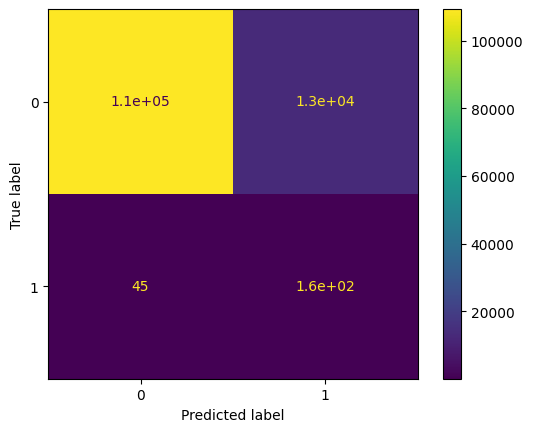

In [ ]:
# Handling  SMOTE weights properly
#SMOTE = balancing the dataset for better training.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
w_train_smote = pd.Series(np.ones(len(y_train_smote)))
w_train_smote[:len(w_train)] = w_train.values       #Keep real samples with their true weights.Give synthetic samples a neutral weight (=1).


print(x_train_smote.shape, y_train_smote.shape)

# Random Forest
final_model1 = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
final_model1.fit(x_train_smote, y_train_smote, sample_weight=w_train_smote)

# Predictions
y_pred = final_model1.predict(x_test)

# Training accuracy (on SMOTE data)
print('Training Accuracy (SMOTE,unweighted):', round(final_model1.score(x_train_smote, y_train_smote)*100, 2), '%')
print('Training Accuracy (SMOTE, weighted):',  round(final_model1.score(x_train_smote, y_train_smote, sample_weight=w_train_smote)*100,2))

# Testing accuracy
test_acc_unweighted = round(accuracy_score(y_test, y_pred)*100,2)
test_acc_weighted = round(accuracy_score(y_test, y_pred, sample_weight=w_test)*100,2)
print(f"Testing Accuracy (unweighted): {test_acc_unweighted} %")
print(f"Testing Accuracy (weighted):   {test_acc_weighted} %")

# Precision and Recall
print("Precision:", round(precision_score(y_test, y_pred, sample_weight=w_test)*100,2))
print("Recall   :", round(recall_score(y_test, y_pred, sample_weight=w_test)*100,2))

# ROC AUC
y_test_proba = final_model1.predict_proba(x_test)[:,1]
auc_weighted = round(roc_auc_score(y_test, y_test_proba, sample_weight=w_test)*100,2)
print("ROC AUC (weighted):", auc_weighted,'%')

# ROC Curve
fpr, tpr, thr = roc_curve(y_test, y_test_proba, sample_weight=w_test, pos_label=1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_weighted/100:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Confusion Matrix & Classification Report
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, sample_weight=w_test)
print('Classification Report (weighted by sample_weight):\n', classification_report(y_test, y_pred, sample_weight=w_test))

Cross validation Training Score 83.75
Testing Accuracy Score: 82.63 %
Classification Report:

               precision    recall  f1-score   support

           b       1.00      0.92      0.96 122489.37420422897
           s       0.01      0.71      0.03 207.6524791019955

    accuracy                           0.92 122697.02668333096
   macro avg       0.51      0.81      0.49 122697.02668333096
weighted avg       1.00      0.92      0.95 122697.02668333096



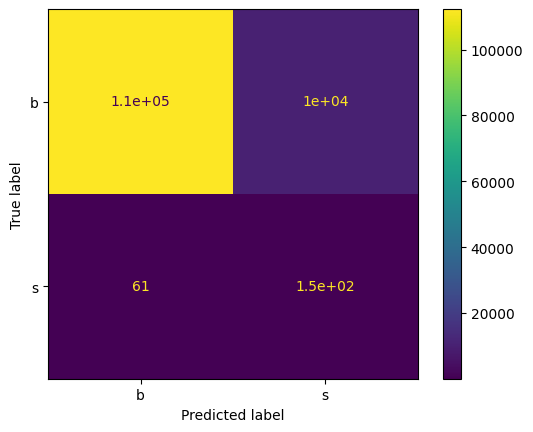

In [ ]:
cross_val_accuracy_score = cross_val_score(final_model,x_train,y_train,cv=10)

print('Cross validation Training Score',round(cross_val_accuracy_score.mean()*100,2))


test_acc = round(accuracy_score(y_test, y_pred)*100, 2)

print(f"Testing Accuracy Score: {test_acc} %")


cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,sample_weight=w_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred,sample_weight=w_test))


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #StratifiedKFold ensures every fold contains both signal and background in correct ratio.
scores = []
for train_idx, val_idx in cv.split(x_train, y_train):          # It gives the training indices and validation indices for each fold, so I can train on one part and validate on the other.
    X_tr, X_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    w_tr, w_val = w_train.iloc[train_idx], w_train.iloc[val_idx]

    clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    clf.fit(X_tr, y_tr, sample_weight=w_tr)
    scores.append(clf.score(X_val, y_val, sample_weight=w_val))

print("\nWeighted CV Mean Accuracy:", np.mean(scores))




Weighted CV Mean Accuracy: 0.9167219947135188


Top Features:
                         Feature  Importance
1   DER_mass_transverse_met_lep    0.059755
0                  DER_mass_MMC    0.055782
15                  PRI_tau_phi    0.053305
18                  PRI_lep_phi    0.051454
2                  DER_mass_vis    0.050377
7            DER_deltar_tau_lep    0.050230
20                  PRI_met_phi    0.049845
13                   PRI_tau_pt    0.049511
19                      PRI_met    0.048666
10         DER_pt_ratio_lep_tau    0.047895


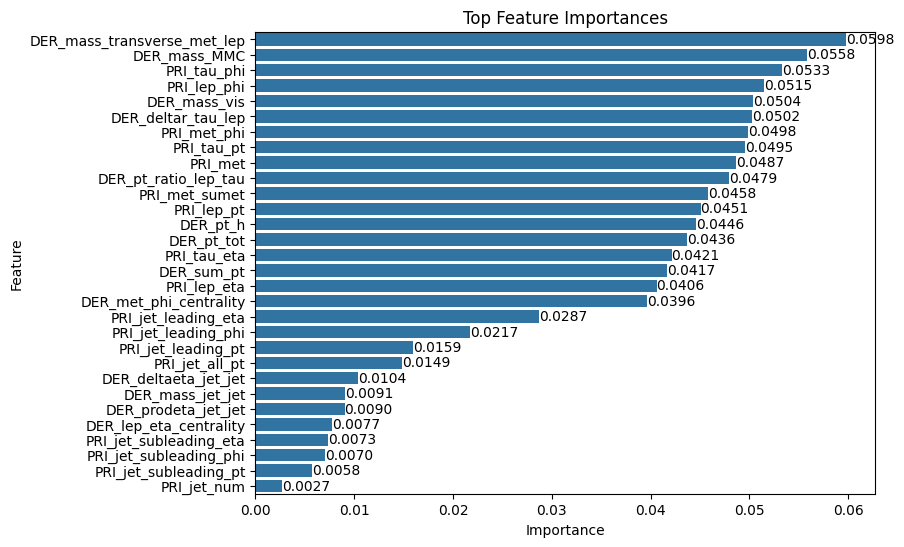

Based on the barplot we can conclude top 18 features is more than enough to train the model: ['DER_mass_transverse_met_lep' 'DER_mass_MMC' 'PRI_tau_phi' 'PRI_lep_phi'
 'DER_mass_vis' 'DER_deltar_tau_lep' 'PRI_met_phi' 'PRI_tau_pt' 'PRI_met'
 'DER_pt_ratio_lep_tau' 'PRI_met_sumet' 'PRI_lep_pt' 'DER_pt_h'
 'DER_pt_tot' 'PRI_tau_eta' 'DER_sum_pt' 'PRI_lep_eta'
 'DER_met_phi_centrality']


In [ ]:
#  Get feature importances
importances = final_model.feature_importances_
features = x_train.columns

feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

print("Top Features:\n", feat_importance_df.head(10))


#  Select top N features

N=30
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(N))
ax.bar_label(ax.containers[0],fmt='%.4f')
plt.title("Top Feature Importances")
plt.show()

N= 18
top_features = feat_importance_df['Feature'].head(18).values

print("Based on the barplot we can conclude top 18 features is more than enough to train the model:",top_features)

# Reduce dataset to selected features
x_train_reduced = x_train[top_features]
x_test_reduced  = x_test[top_features]


In [ ]:
#  Re-train Random Forest with reduced features

rf_selected = RandomForestClassifier(
    n_estimators=150,
    class_weight='balanced',
    random_state=42)

rf_selected.fit(x_train_reduced, y_train, sample_weight=w_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

Training Accuracy Score(unweighted) with important feature: 100.0 %
Training Accuracy Score(weighted) with important feature: 100.0 %
Testing Accuracy Score (unweighted): 81.83 %
Testing Accuracy Score (weighted):   90.73 %
Precision: 1.3
Recall   : 0.7171830610788369
ROC AUC (weighted): 91.83 %


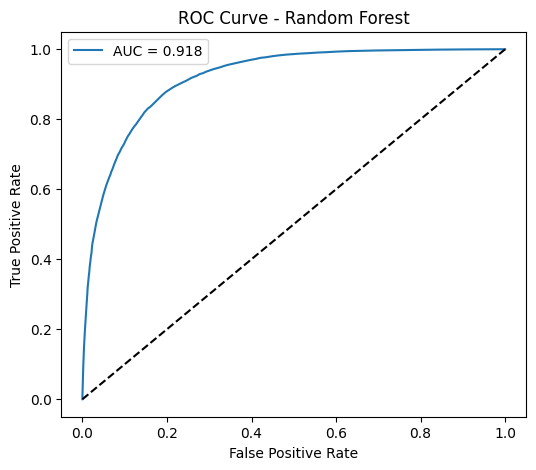

Classification Report (weighted by sample_weight):

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.91      0.95 122489.37420422897
           1       0.01      0.72      0.03 207.6524791019955

    accuracy                           0.91 122697.02668333096
   macro avg       0.51      0.81      0.49 122697.02668333096
weighted avg       1.00      0.91      0.95 122697.02668333096



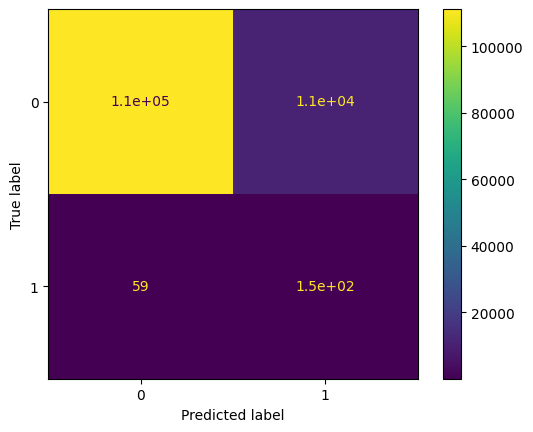

In [ ]:

# Evaluate model

# predictions
y_pred = rf_selected.predict(x_test_reduced)

#training score for unweighted and weighted
print('Training Accuracy Score(unweighted) with important feature:', round(rf_selected.score(x_train_reduced, y_train)*100, 2), '%')
print('Training Accuracy Score(weighted) with important feature:', round(rf_selected.score(x_train_reduced, y_train,sample_weight=w_train)*100, 2), '%')

#testing score for unweighted and weighted
test_acc_unweighted = round(accuracy_score(y_test, y_pred)*100, 2)
test_acc_weighted = round(accuracy_score(y_test, y_pred, sample_weight=w_test)*100, 2)

print(f"Testing Accuracy Score (unweighted): {test_acc_unweighted} %")
print(f"Testing Accuracy Score (weighted):   {test_acc_weighted} %")



print("Precision:", round(precision_score(y_test, y_pred, sample_weight=w_test)*100,2))
print("Recall   :", recall_score(y_test, y_pred, sample_weight=w_test))

#ROC AUC (Area Under the Receiver Operating Characteristic Curve).
#Measures how well the model separates signal from background across all probability thresholds.
#sample_weight=w_test → gives more importance to significant events, which is critical in particle physics.

y_test_proba = rf_selected.predict_proba(x_test_reduced)[:, 1]  # probability of positive (signal) class
auc_weighted = round(roc_auc_score(y_test, y_test_proba, sample_weight=w_test)*100,2)
print("ROC AUC (weighted):", auc_weighted,'%')


fpr, tpr, thr= roc_curve(y_test, y_test_proba, sample_weight=w_test,pos_label=1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_proba, sample_weight=w_test):.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

print("Classification Report (weighted by sample_weight):\n")
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,sample_weight=w_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred,sample_weight=w_test))


In [ ]:
# data scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)

# test scaling
x_test_scaled = scale.transform(x_test)

Checking  the accuracy score against model such as Bagging,Random Forest,AdaBoost,GDBoost,KNN
  Model Name  Accuracy
0    Bagging  0.804987
1         RF  0.826440
2   AdaBoost  0.657333
3    GDBoost  0.668707
4        KNN  0.778253


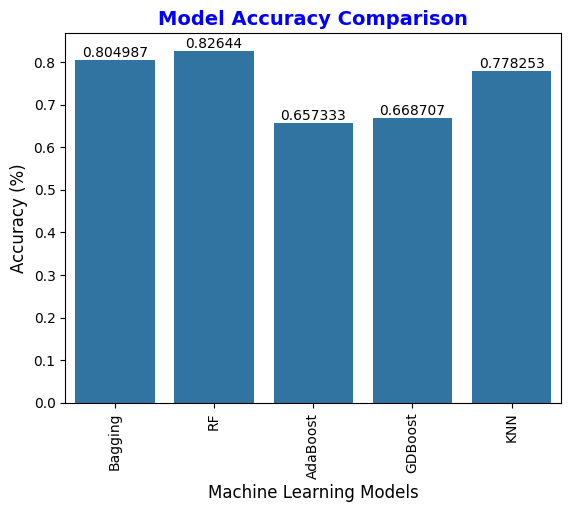

In [ ]:
list_model = []
list_accuracy = []

# BaggingClassifier
bagging = BaggingClassifier(n_jobs=-1)     #It works by combining predictions from multiple models,Reduces variance and prevents overfitting.
bg = bagging.fit(x_train, y_train,sample_weight=w_train)
y_pred_bg = bagging.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# RandomForestClassifier       #Many Decision Trees trained on random bootstrapped samples + random feature selection → aggregated via voting/averaging → robust, accurate, and reduces overfitting.
rforest = RandomForestClassifier(n_jobs=-1)
rf = rforest.fit(x_train, y_train,sample_weight=w_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# AdaBoostClassifier
adaboost = AdaBoostClassifier()          #giving more weight to misclassified samples from previous models.
ada = adaboost.fit(x_train, y_train,sample_weight=w_train)
y_pred_ada = adaboost.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# GradientBoostingClassifier
gdboost = GradientBoostingClassifier()  #combining multiple weak learners (usually decision trees) sequentially, where each new model tries to correct the errors of the previous model.
gd = gdboost.fit(x_train, y_train,sample_weight=w_train)
y_pred_gd = gdboost.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)


# KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
kn = knn.fit(x_train_scaled, y_train)
y_pred_kn = knn.predict(x_test_scaled)
accuracy_kn = accuracy_score(y_test, y_pred_kn)


list1 = ['Bagging','RF','AdaBoost','GDBoost','KNN']
list2 = [accuracy_bg,accuracy_rf,accuracy_ada, accuracy_gd, accuracy_kn]

print("Checking  the accuracy score against model such as Bagging,Random Forest,AdaBoost,GDBoost,KNN")
df_accuracy = pd.DataFrame({'Model Name':list1, 'Accuracy':list2})
print(df_accuracy)
ax = sns.barplot(x='Model Name', y='Accuracy', data=df_accuracy)
ax.bar_label(ax.containers[0])
ax.set_title("Model Accuracy Comparison", fontsize=14, fontweight='bold', color='blue')
ax.set_xlabel("Machine Learning Models", fontsize=12)
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


**Observations**

*   Data set Contains 250000 rows and 33 columns
*   There are 32 numerical features and 1 categorical features
*   The data has 0 duplicate rows.
*   Label has 2 unique value(i.e "s"- > Signal,"b"-> Background noise)
*   The target label proportion is "b" ->65.73% and "s"-> 34.27%.The data  is midly imbalaced data.
*   The target label( Background Contains - 164333 dp's and Signal contains-> 85667 dp's)
*   No of Integer columns : 2
*   No of float columns: 30
*   No of Object columns:1
*  There are 0 duplicated rows
*   For treating outliers, applied Winsorization using IQR (also called fence method).
*   Training Accuracy Score(unweighted): 100.0 %
*  Training Accuracy Score(weighted): 100.0 %
*  Testing Accuracy Score (unweighted): 82.63 %
*  Testing Accuracy Score (weighted):   91.65 %
*   ROC AUC (weighted): 91.99 %
*   Cross validation Training Score 83.75
*  Testing Accuracy Score: 82.63 %
*   Bagging Accuracy  0.805253   
*    RF Accuracy  0.825720
*   AdaBoost Accuracy  0.657333
*    GDBoost Accuracy  0.667973
*   KNN  Accuracy 0.791960
*   Out of all the model such as Bagging,Random Forest,AdaBoost,GDBoost,KNN----> Random Forest gives high accuracy.


























Project Done By,  
     S.SUGUNA ME